In [52]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import os

In [53]:
image = imread("//content//drive//MyDrive//lena.jpg")
image.shape

(512, 512, 3)

# 새 섹션

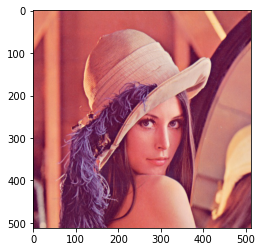

In [54]:
plt.imshow(image)

In [57]:
X = image.reshape(-1,3)

cluster_lst = [3, 6, 9, 12, 15, 20]
result = []
for i in cluster_lst:
  kmeans = KMeans(n_clusters=i).fit(X)
  seg_img = kmeans.cluster_centers_[kmeans.labels_]
  seg_img = seg_img.reshape(image.shape)
  seg_img = seg_img.astype(np.uint8)
  result.append(seg_img)

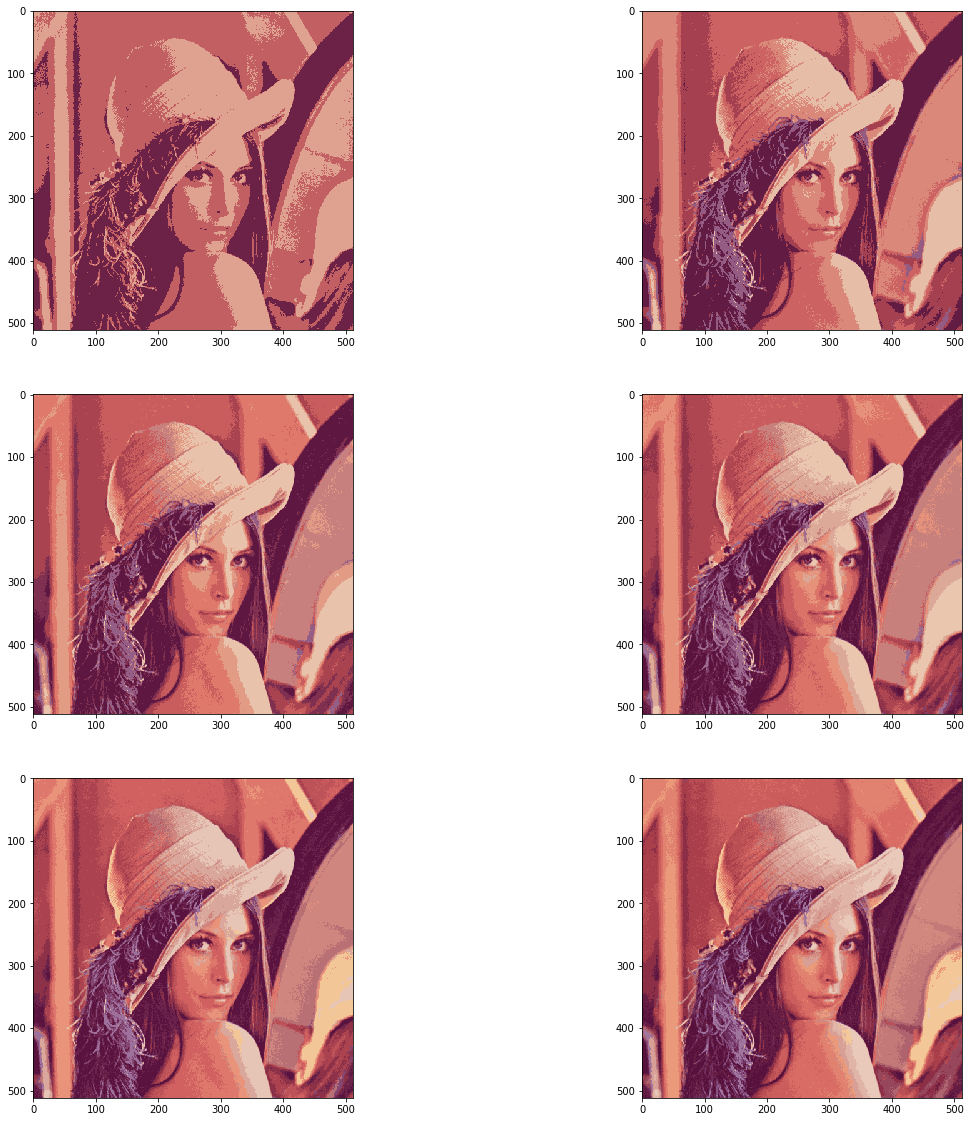

In [75]:
fig1 = plt.figure(figsize = (20,20))

for i in range(len(cluster_lst)):
  ax = fig1.add_subplot(3,2,i+1)
  ax.imshow(result[i], interpolation='none')

In [76]:
from sklearn.cluster import DBSCAN

In [ ]:
X = image.reshape(-1,3)

min_samples_lst = [1, 3, 6, 9, 12, 15, 20]
eps_lst = [0.01, 1.5]
result = []
for i in min_samples_lst:
  for j in eps_lst:
    dbscan = DBSCAN(eps=j, min_samples=i).fit(X)
    seg_img = dbscan.components_[dbscan.labels_]
    seg_img = seg_img.reshape(image.shape)
    seg_img = seg_img.astype(np.uint8)
    result.append(seg_img)

In [ ]:
fig1 = plt.figure(figsize = (20,20))

for i in range(len(cluster_lst)*len(eps_lst)):
  ax = fig1.add_subplot(6,2,i+1)
  ax.imshow(result[i], interpolation='none')